In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# 添加以下代码，可以在图标中使用中文。
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

### 1、深圳北站_各小时使用通用参数值的最佳值分析

In [2]:
data = pd.read_excel("深圳北站_全使用相同参数_差量精细化模拟实验结果_1529894741.xlsx", sheet_name="result")
data.head()

,carStorageTimes,disPersion,correct_report_rate,accurate_report_rate,false_report_rate,miss_report_rate,est_num,real_num,Unnamed: 8
0,20,0.00,0.785714,0.810526,0.214286,0.189474,784,760,1.596241
1,20,0.01,0.785714,0.810526,0.214286,0.189474,784,760,1.596241
2,20,0.02,0.785897,0.817333,0.214103,0.182667,780,750,1.603231
3,20,0.03,0.772135,0.805707,0.227865,0.194293,768,736,1.577842
4,20,0.04,0.769737,0.802469,0.230263,0.197531,760,729,1.572206


In [3]:
def showData(plt,n=20):
    """
    """
    data_n = data[data["carStorageTimes"] == n]
    x = data_n["disPersion"]
    plt.plot(x, data_n["correct_report_rate"])
    return plt

In [4]:
def showData2(plt,n=0.05):
    data_n = data[data["disPersion"] == n]
    x = data_n["carStorageTimes"]
    plt.plot(x, data_n["correct_report_rate"])
    return plt

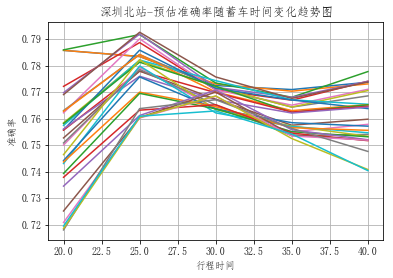

In [5]:
legend = []
for i in range(30):
    plt = showData2(plt, i/100)
    legend.append(str(i))
    
# plt.legend(legend, loc="lower left")    
plt.title("深圳北站-预估准确率随蓄车时间变化趋势图")
plt.ylabel("准确率")
plt.xlabel("行程时间")
plt.grid(True)
plt.show()

如上图，可以清晰地看到，绝大部分最值点落在等待时间为25MIN上，下面仅需要在蓄车时间为25MIN的时候，获取准确率的最大值点即可。

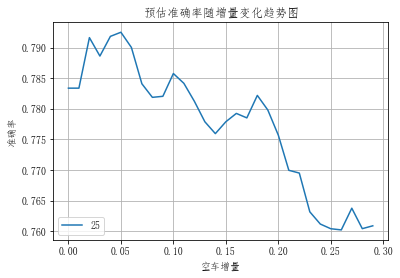

In [6]:
legend = []
for i in [25]:
    plt = showData(plt, i)
    legend.append(str(i))
    
plt.legend(legend, loc="lower left")    
plt.title("预估准确率随增量变化趋势图")
plt.ylabel("准确率")
plt.xlabel("空车增量")
plt.grid(True)
plt.show()

#### 综上分析，深圳北站如果选择一个通用值，建议选用（25， 0.05）

### 2、深圳北站_各小时使用不同参数数值的最佳值分析

In [7]:
data = pd.read_excel("深圳北站_每小时不同参数_差量精细化模拟实验结果_1529895227.xlsx", sheet_name="result")
data.head()

,hour,carStorageTimes,disPersion,correct_report_rate,accurate_report_rate,false_report_rate,miss_report_rate,est_num,real_num
0,0,20,0.0,0.880000,0.956522,0.120000,0.043478,25,23
1,1,20,0.0,0.437500,1.000000,0.562500,0.000000,16,7
2,8,20,0.0,0.622642,0.634615,0.377358,0.365385,53,52
3,9,20,0.0,0.780822,0.740260,0.219178,0.259740,73,77
4,10,20,0.0,0.312500,0.555556,0.687500,0.444444,16,9


In [8]:
def showData(plt,n=20, hour=0):
    """
    """
    data_n = data[data["carStorageTimes"] == n & data["hour"]==hour]
    x = data_n["disPersion"]
    plt.plot(x, data_n["correct_report_rate"])
    return plt

In [ ]:
legend = []
for i in range(30):
    plt = showData2(plt, i/100)
    legend.append(str(i))
    
# plt.legend(legend, loc="lower left")    
plt.title("深圳北站-预估准确率随蓄车时间变化趋势图")
plt.ylabel("准确率")
plt.xlabel("行程时间")
plt.grid(True)
plt.show()